# TestingEvaluateClass_TestingZone

# Libraries

In [1]:
# directory set up 
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

# data attainment
import pandas as pd

# mathematical
import tensorflow as tf
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from Extra_Work.PythonFiles.preprocessing import scale_data

# modelling
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LayerNormalization, BatchNormalization, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
# evaluation
from Extra_Work.PythonFiles.modelling import evaluate_models
from Extra_Work.PythonFiles.modelling import FeedForward

# plotting
import matplotlib.pyplot as plt

# setting global seeds
#tf.random.set_seed(1)
#np.random.seed(1)

# Data

In [101]:
# load data

df = pd.read_csv('../Data/dataset2.csv')

X, scalers = scale_data(df[df.columns[:-1]], mode = 'robust')
# for best model, put robust mode. Try with standard too
#X['Spring constant (N per m)'] = 0
#X['Ball radius (mm)'] = 0
#X = 2*((X-X.min())/(X.max() - X.min())) - 1



y = df[df.columns[-1]]

y_binary = to_categorical(y)

data = train_test_split(
    X,y_binary, test_size = 0.2, random_state = 23
)
X.describe()

,Arm length (m),Ball weight (kg),Ball radius (mm),Air temperature (deg C),Spring constant (N per m),Device weight (kg)
count,4.000000e+03,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000
mean,-2.883128e-03,0.001475,2.563953e-01,-0.005958,0.221595,0.000459
std,7.520443e-01,0.743236,9.599955e-01,0.812360,0.905493,0.578888
min,-1.913423e+00,-2.275288,-1.105124e+00,-2.000000,-1.129669,-0.991366
25%,-5.131259e-01,-0.491466,-3.737823e-01,-0.500000,-0.409808,-0.497589
50%,-2.102844e-16,0.000000,-1.160367e-16,0.000000,0.000000,0.000000
75%,4.868741e-01,0.508534,6.262177e-01,0.500000,0.590192,0.502411
max,2.880758e+00,2.713207,7.489261e+00,1.833333,5.936071,1.017495


In [3]:
X = np.asarray(X)

In [4]:
y_binary

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Data Exploration

# Model Cell

In [117]:
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.activations import elu, relu
from tensorflow.keras.layers import Activation, PReLU
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LayerNormalization

from tensorflow.keras.layers import Lambda
import tensorflow.keras.backend as K
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.initializers import TruncatedNormal
def logFunc(x):
    return K.log(x)

# add automation to this
def uncompiled_model():
    
        
    # adi (guess)
    
    #model.add(Dense(9, activation = 'elu', input_dim = 6))
    #model.add(BatchNormalization())
    #model.add(Dense(8, activation = 'elu',))
    #model.add(BatchNormalization())


    #model.add(Dense(8, activation = 'elu'))
    #model.add(BatchNormalization())

    #model.add(Dense(7, activation = 'elu'))
    #model.add(BatchNormalization())


    # kyriacos' model
    #model.add(Dense(units = 15, activation = 'tanh', input_dim = 6))
    #model.add(Dense(units = 15, activation = 'tanh', input_dim = 6))
    #model.add(Dense(units = 15, activation = 'tanh', input_dim = 6))
    

    inputs = Input(shape=(6,), name='Data')
    #x = Lambda(logFunc)(inputs)
    #x = Normalization()(x)
    #x = Dense(8, activation = 'elu',
    #          bias_initializer = Constant(0.5),
    #          kernel_initializer = TruncatedNormal())(inputs) # had this before
    #x = BatchNormalization()(x)
    #x = Dense(8, activation='elu',
    #          kernel_initializer = TruncatedNormal())(x)
    #x = BatchNormalization()(x)
    #x = Dense(8, activation='elu',
             # kernel_initializer = TruncatedNormal())(x)
    #x = Dense(8, activation='elu',
             # kernel_initializer = TruncatedNormal())(x)

    x = Dense(16, activation = 'tanh')(inputs)
    #x = BatchNormalization()(x)


    x = Dense(8, activation = 'tanh')(x)
    #x = BatchNormalization()(x)


    x = Dense(16, activation = 'tanh')(x)
    #x = BatchNormalization()(x)






    #x = BatchNormalization()(x)
    #x = Dense(4, activation='relu')(x)
    #x = BatchNormalization()(x)


    outputs = Dense(2, activation = 'softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)


#And create a lambda layer with it:



    #model.add(Dense(4, activation = 'tanh'))

    #model.add(Dense(8, activation = 'relu'))
    #model.add(BatchNormalization())


    # tanh 9887 is good!
    #model.add(Dense(units = 2, activation = 'softmax'))
    
    

# try maxout layers!!!!

    #outputs = Dense(2, activation='sigmoid', name='TargetHit')(x)
    # remember, you might have to make ur output a sigmoid!


    # chris model
    #x = Dense(3, activation='linear')(inputs)
    #outputs = Dense(2, activation = 'sigmoid')(x)
    
    
    return model

# will get penalised for model complexity, make sure you decrease this

def compile_model():
    model = uncompiled_model()
    model.compile(
        #optimizer="adam", # next step, add custom optimizers and modify learning 
        optimizer=Adam(learning_rate = 0.001),
        # rates. Adam yelds the best values
        loss="binary_crossentropy", # binary_crossentropy
        metrics=["accuracy",
                 "binary_accuracy",
                 "binary_crossentropy",
                 "categorical_accuracy"
                 ],
    )
    return model

    

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(patience = 25)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


from sklearn.model_selection import KFold
from time import time
def cross_validate(data,K = 5, **kwargs):
    scores = []
    histories = []
    X = np.concatenate((data[0], data[1]), axis = 0)
    y = np.concatenate((data[2], data[3]), axis = 0)
    for train, test in KFold(n_splits=K, shuffle=True).split(X,y):
        model = compile_model()
        start = time()
        histories.append(model.fit(X[train], y[train],
                                   validation_data = (X[test],y[test]),
                                   **kwargs).history)
        print(time() - start)
        scores.append(model.evaluate(X[test], y[test], verbose = 0))
        
    print("average loss: ", np.asarray(scores)[:,0].mean())
    print("average accuracy: ", np.asarray(scores)[:,1].mean()) # make sure that accuracy is the first metric in compile
    print(model.summary())
    #model = compile_model()
    #model.fit(data[0],data[2],**kwargs)
    #print(model.evaluate(data[1],data[3]))
    return scores, histories

def plot_histories(histories, metrics = ['loss', 'accuracy', 'val_accuracy','val_loss']):
    fig, axes = plt.subplots(nrows = (len(metrics) - 1) // 2 + 1, ncols = 2, figsize = (16,16))
    axes = axes.reshape((len(metrics) - 1) // 2 + 1, 2)
    for i,metric in enumerate(metrics):
        for history in histories:
            axes[(i+2)//2 - 1, 1 - (i+1)%2].plot(history[metric])
            axes[(i+2)//2 - 1, 1 - (i+1)%2].axhline(y=max(history[metric]))
            axes[(i+2)//2 - 1, 1 - (i+1)%2].set_xticks(
                np.arange(max(history[metric]))
            )
                
            
        plt.legend([i for i in range(len(histories))])
        


In [121]:
scores, histories = cross_validate(data, K = 5, 
                                   epochs = 2000,
                                   # set to 1000 for good performance on YOUR model
                                   verbose = 0,
                                   batch_size = 128, # best when set to 50, 128 does not work bad either? So does 156! Early stopping will probably really help you model !
                                   # set to 128 for your model
                                   shuffle = True)
                                   #callbacks = [reduce_lr])
#validation_split = 0.1, callbacks = [early_stopping]) #)
print(scores)

# try supplying customw weights, also see below suggestions

222.58534908294678
259.1945641040802
132.23927402496338
200.49795389175415
130.47012400627136
average loss:  0.3897940099239349
average accuracy:  0.8582499980926513
Model: "functional_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Data (InputLayer)            [(None, 6)]               0         
_________________________________________________________________
dense_757 (Dense)            (None, 16)                112       
_________________________________________________________________
dense_758 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_759 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_760 (Dense)            (None, 2)                 34        
Total params: 426
Trainable params: 426
Non-trainable params: 0
____________________

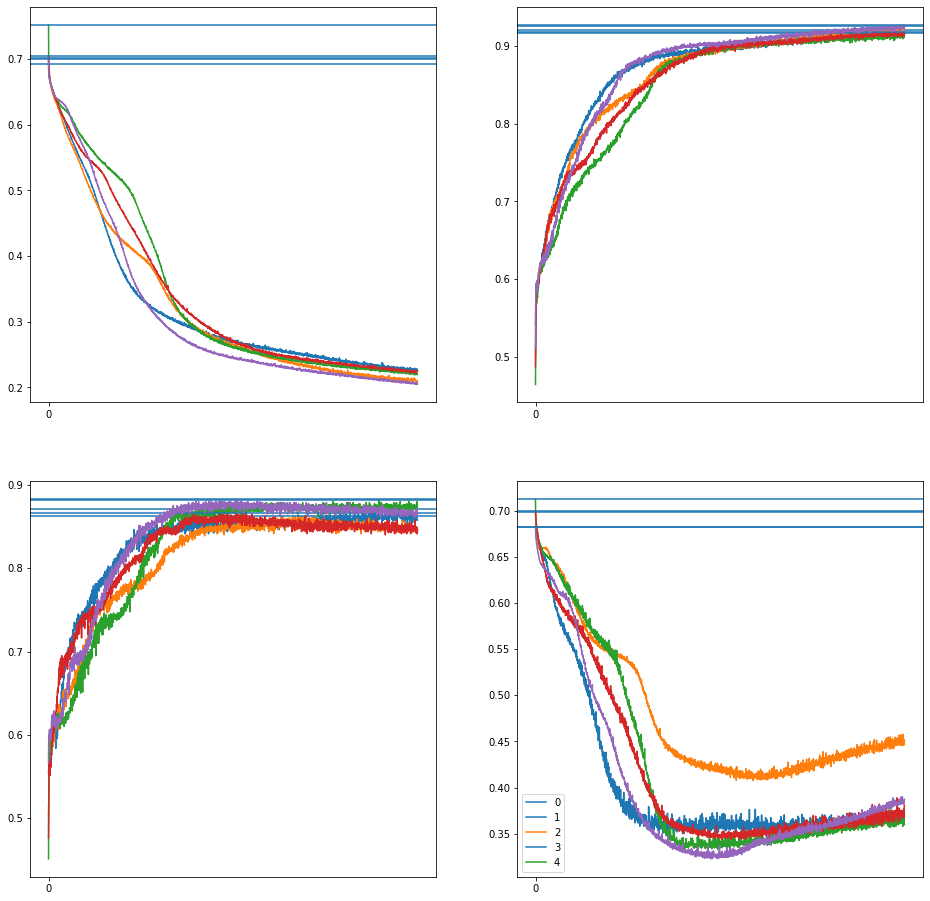

In [122]:
plot_histories(histories)